# Regresión Logística

### Función Logística Estándar
> 1 / 1 + e**(b0 + b1x)
>
    >> La función con el hecho de tener un 1 en el numerador, esta acotando los valores que tiene la función de cero a uno.
>
    >> La e, se refiere al número de euler.
>
    >> b0 corresponde al punto donde la línea cruza el eje de las Y.
>
    >> b1 corresponde a la pendiente de la línea.
>
> Ahora, vamos a programar y graficar la función logística 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Creamos una función logística vectorial (ufuncs)
# Vamos a usar este modelo de función ya que vamos a dar por sentado que, tenemos una gran cantidad de datos.
logistica = np.frompyfunc(lambda b0, b1, x: 1 / (1 + math.exp(-(b0 + b1 * x))),
                          3, 1)

> Como vemos en el código anterior, creamos la función universal con **frompyfunc** y le pasamos como argumento una función anónima o función lambda y usamos la ecuación, pasando b1, b1, x para indicar los tres parámetros.
>
> Luego de construir la ecuación, le pasamos 2 parámetros más a la función (pyfunc). Estos parámetros indican que tenemos 3 parámetros de entrada y 1 parámetro de salida.

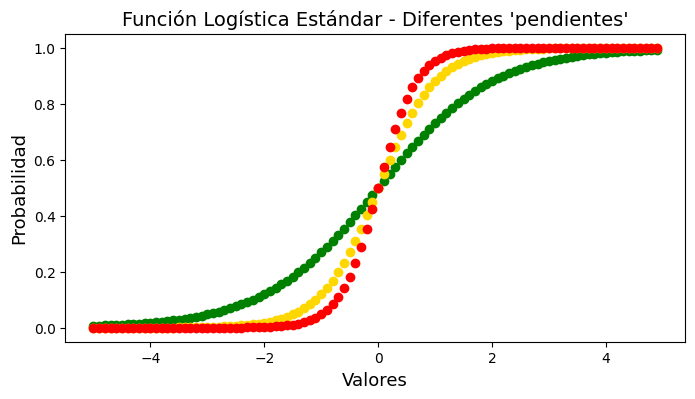

In [4]:
# Ahora, vamos a graficar la función logística con diferentes pendientes
plt.figure(figsize=(8, 4))

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 1, np.arange(-5, 5, 0.1)),
            color="green")

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 2, np.arange(-5, 5, 0.1)),
            color="gold")

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 3, np.arange(-5, 5, 0.1)),
            color="red")

plt.title("Función Logística Estándar - Diferentes 'pendientes'", fontsize=14.0)
plt.ylabel("Probabilidad", fontsize=13.0)
plt.xlabel("Valores", fontsize=13.0)
plt.show()

> Como vemos arriba, estamos usando una gráfica de dispersión (scatter), y le damos un rango en el cual decimos que queremos los datos desde **el -5 hasta el 5 y saltos de 0.1 en 0.1**. Y le pasamos los datos de nuestra función que serían b0 = 0 y pendiente = 1. "Pendiente" se refiere a cuanto de inclinado esta.
>
> Depués pasamos a evaluar la funciónn logística con un vector (x), la x corresponde justamente al rango que estamos graficando.
>
> Ahora vamos a completar la grafica dando algunos colores para ver las diferencias entre las diferentes funciones logí0sticas que estamos graficando, que en este caso serán 3.
>
> Todas recibieron el mismo vector x, lo que cambiaría es la pendiente.
>
    >> Esta gráfica nos puede mostrar que cuando nosotros ajustamos la pendiente, se podría ajustar a una forma diferente a nuestros datos. Este ejemplo, esta directamente vinculado al algoritmo de optimización con el que nosotros creamos el modelo de regresión logística. Por lo que decimos que estamos ajustando son los parámetros de nuestra función logística.

# Taquicardia: Probabilidad y Clase

- Vamos a aterrizar un poco más lo que hemos visto.
>
> Vamos a ver como se comporta con los datos correspondientes a nuestro dominio.

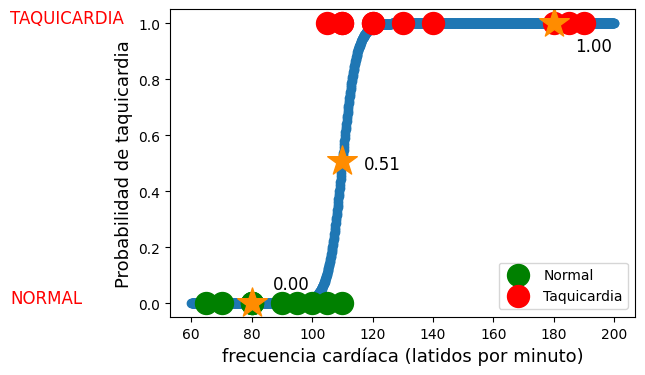

In [5]:
# Persona Normal de 60 a 100 latidos por minuto.
# Persona con taquicardia de hasta 220 latidos por minuto.

personas_normal = [65, 70, 80, 80, 80,
                  90, 95, 100, 105, 110]

personas_taquicardia = [105, 110, 110, 120, 120,
                        130, 140, 180, 185, 190]

# Graficamos una función logística
plt.figure(figsize=(6, 4))

# y = b0 'b1x
# y = -46.68057196 + 0.42460226x

plt.scatter(np.arange(60, 200, 0.1),
            logistica(-46.68057196, 0.42460226,
                      np.arange(60, 200, 0.1)))

# Graficamos la frecuencia cardíaca de las personas
plt.scatter(personas_normal, [0]*10,
            marker="o", c="green", s=250, label="Normal")
plt.scatter(personas_taquicardia, [1]*10,
            marker="o", c="red", s=250, label="Taquicardia")

# Graficamos la probabilidad para tres (3) individuos
individuos = [80, 110, 180]

probabilidades = logistica(-46.68057196, 0.42460226, individuos)

plt.scatter(individuos, probabilidades,
            marker="*", c="darkorange", s=500)

plt.text(individuos[0]+7, 0.05, "%0.2f" % probabilidades[0],
         size=12, color="black")
plt.text(individuos[1]+7, 0.48, "%0.2f" % probabilidades[1],
         size=12, color="black")
plt.text(individuos[2]+7, 0.90, "%0.2f" % probabilidades[2],
         size=12, color="black")
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")
plt.text(0, 0, "NORMAL", size=12, color="red")
plt.ylabel("Probabilidad de taquicardia", fontsize=13.0)
plt.xlabel("frecuencia cardíaca (latidos por minuto)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

### Ya que tenemos una idea de como se comporta el modelo con los datos proporcionados, vamos a ver con un poco más de detalle, como se contruyen estos modelos de regresión logística.

## Máxima Verosimilitud

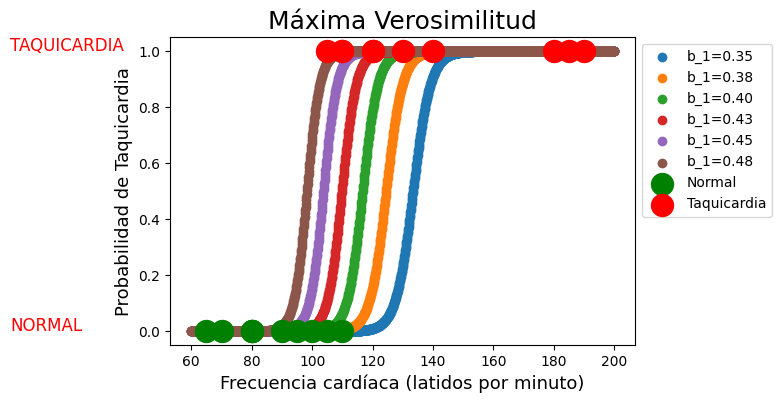

In [6]:
# Diferentes funciones logísticas con diferentes "pendientes"
plt.figure(figsize=(6, 4))

for b1 in np.arange(0.35, 0.49, 0.025):
    plt.scatter(np.arange(60, 200, 0.1), 
                logistica(-46.68057196,
                          b1,
                          np.arange(60, 200, 0.1)),
                label="b_1=%0.2f" % b1)  
   
# Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")    
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")     

plt.title("Máxima Verosimilitud", fontsize=18.0)
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")
plt.text(0, 0, "NORMAL", size=12, color="red")
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Modelo de Regresión Logística

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Creamos conjuntos de entrenamiento y de prueba del modelo
datos_entrena, datos_prueba, clase_entrena, clase_prueba = \
    train_test_split(frecuencias_cardiacas,
                     clase, 
                     test_size=0.30)

# Creamos el modelo de Regresión Logística
modelo = LogisticRegression().fit(datos_entrena, clase_entrena)
np.set_printoptions(suppress=True)
print("Individuos usados para probar el método:")
print(modelo.predict(datos_prueba))
print("Probabilidad de la predicción (0, 1) de cada individuo:")
print(modelo.predict_proba(datos_prueba))
print("Porcentaje de clasificación correcta:")
print(modelo.score(datos_prueba, clase_prueba))
print("Valores de b0 y b1")
print(modelo.intercept_, modelo.coef_)

Individuos usados para probar el método:
[0 0 1 1 1 0]
Probabilidad de la predicción (0, 1) de cada individuo:
[[0.9356209  0.0643791 ]
 [0.99656906 0.00343094]
 [0.08985945 0.91014055]
 [0.42100655 0.57899345]
 [0.42100655 0.57899345]
 [0.66367441 0.33632559]]
Porcentaje de clasificación correcta:
1.0
Valores de b0 y b1
[-21.64516112] [[0.19967094]]
